# Caceria [D_S] Lord Mobile

# Caceria Gremio D_S

Como gremio la caceria de monstruos es importante para el crecimiento. En este contexto todos los jugadores tienen un objetivo diario por cumplir en caceria, el cual depende del nivel de castilllo. El siguiente cuadro muestra los objetivos diarios de cada jugador

Nivel jugador | Objetivo diaria
--- | ---
1-14 | 1
15-19 | 2
20-23 | 3
24 | 4
25 | 5

Para porder realizar un seguimiento que permita identificar a los jugadores que más aportan en la caceria de monstruos se ha asignado un puntaje por jugador dependiendo de las cacerias que realizen. El puntaje depende de que nivel de monstruo cacen, siguiente el siguiente cuadro

Nivel monstruo | Puntaje por monstruo
---   | ---
N1    | 1
N2    | 4
N3    | 16
N4    | 64

--- 

## Caceria Mensuales

**Objetivo** : mostrar los resultados por semanas

> 1. Caceria totales
> 2. Ranking por puntajes

---

## Caceria Individuales mensuales
**Objetivo** : ver el avance de cada jugador por mes

> 1. Registro de las cacerias individuales por mes

---

## Caceria Individuales ultimo dia

> 1. Registro de las cacerias individuales del último día
> 2. Comparativa con los objetivos diarios de cada jugador por nivel de castillo

---

## Pendientes
1. Registro de jugadores:
    - registro de todos los miembros del gremio actualizada
    - registro del nivel de castillo de cada jugador
2. Resultados individuales por semana
    - plot
    - pie char

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

niveles = ['N1', 'N2', 'N3', 'N4']

puntaje = [1, 4, 16, 64]

In [17]:
df = pd.read_csv('./output/output_cap_jul25.txt')
print(df.sort_values('Puntaje',ascending=False))

          Nombre  N1  N2  N3  N4  Puntaje
0        juand98   9   1   6   1      171
3   lordkanino19   6  11   4   0       92
9       deathiro   1   1   1   0       19
38     morriganc   2   0   1   0       18
23   sathariel69  16   0   0   0       16
31         dyk12  15   0   0   0       15
5          srcel  14   0   0   0       14
24     br1mrcelo  13   0   0   0       13
6       diofanto   6   2   0   0       10
13    n4versachi   3   3   0   0        9
30      condepuf   7   0   0   0        7
19        nathy7   6   0   0   0        6
28   yxxsimbaxxy   6   0   0   0        6
27     xacobeo21   6   0   0   0        6
16         elver   5   0   0   0        5
25  theriver2007   5   0   0   0        5
26      ziondies   5   0   0   0        5
34         jocs4   0   2   0   0        4
15           rpd   0   2   0   0        4
17   eltemplari0   4   0   0   0        4
36        ca0sss   4   0   0   0        4
10        wirito   2   1   0   0        4
8       gadriels   4   0   0   0  

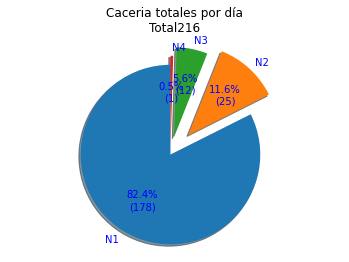

In [18]:
general = df.loc[:,niveles].sum()

sizes = [15, 30, 45, 10]
explode = (0, 0.3, 0.2, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots()
ax1.pie(general.values, explode=explode, labels=niveles, autopct=lambda pct: func(pct, general.values),
        shadow=True, startangle=90, textprops=dict(color="b"))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Caceria totales por día\nTotal%i'%general.values.sum())

plt.show()

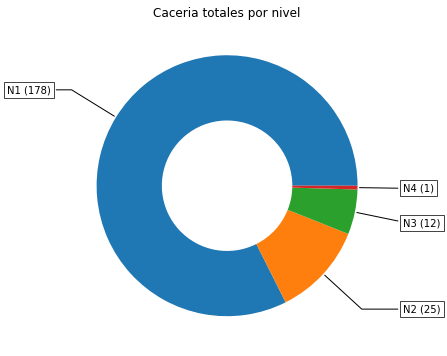

In [28]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

data = df.loc[:,niveles].sum()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate('%s (%i)'%(niveles[i],data[i]), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Caceria totales por nivel")

plt.show()

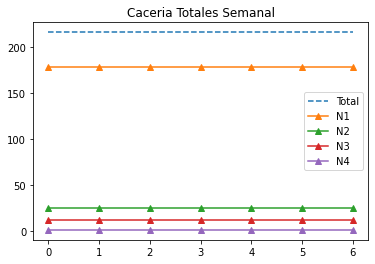

In [24]:
plt.plot(np.arange(7), np.ones(7)*general.sum(), '--', label='Total')
for nivel in niveles:
    plt.plot(np.arange(7),np.ones(7)*general.loc[nivel],'^-',label=nivel)
plt.title('Caceria Totales Semanal')
plt.legend()
plt.show()

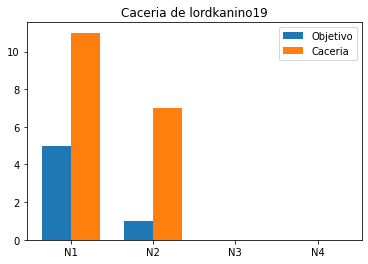

In [ ]:

objetivo = [5,1,0,0]
x = np.arange(len(niveles))
width = 0.35

datos = df.loc[22]

fig, ax = plt.subplots()

ax.bar(x - width/2, objetivo, width=width,label='Objetivo')
ax.bar(x + width/2, datos.loc[niveles].values,width=width, label='Caceria')
ax.set_title('Caceria de %s'%datos.loc['Nombre'])
ax.set_xticks(x)
ax.set_xticklabels(niveles)
ax.legend()

plt.show()

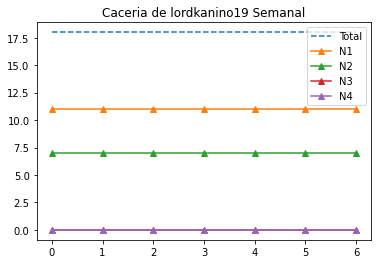

In [ ]:
plt.plot(np.arange(7), np.ones(7)*datos.loc[niveles].sum(), '--', label='Total')
for nivel in niveles:
    plt.plot(np.arange(7),np.ones(7)*datos.loc[nivel],'^-',label=nivel)
plt.title('Caceria de %s Semanal'%datos.loc['Nombre'])
plt.legend()
plt.show()